In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2024-11-01'
end='2024-11-30'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** file size (106483) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//NOV2024_codedAndCategorised.xlsx


J:\My Drive\NAS\My Documents\Business\Property\Statements\working\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:165: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2024-11-01,20-74-09 60458872,-20.0,Funds Transfer,SOFIA POCKET MONEY FT,NaN,NaN,PersonalExpense,Sofia
2024-11-01,60-83-71 00558156,-100.0,REPAIRS_AND_MAINTENANCE,Lordswood Estates M Tucker SC,NaN,NaN,ServiceCharge,NaN
2024-11-01,60-83-71 00558156,100.0,REVENUE,Lordswood Estates M Tucker SC,NaN,NaN,ServiceCharge,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Peter Gradon (28/02/2018)','Camilla Bailey & Michael Gregson (31/08/2023)','Charlotte McLellan-Campbell & Jose Gongora Oliva (10/09/2023)']
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,0,0,0,
Flat 1 - 321 London Rd,Ruksana Akter Chowdhury (09/08/2023),None,725,-113,-481,131,Paid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,750,0,-458,292,Paid
Flat 3 - 321 London Rd,Holman & Wolfe (28/12/2023),None,1050,-684,-396,-29,Paid
Flat 4 - 321 London Rd,Chloe Freshney & Harry Aldingtons (31/01/2023),None,725,0,-481,244,Paid
169 Fawcett Rd,,,0,-49,0,-49,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,675,0,-433,242,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,775,0,-393,382,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,750,0,-459,291,Paid


Notes:
- F1 321 Chowdhury moved in day after Soumya Xaviour moved out, there were no Fox & Sons fees for this tenant
- F17 46 Sophie Bedford moved out end of July, Camilla Bailey & Michael Gregson move in 31/08/23
    - in September they paid 6 months in advance to 28/02/23
- 23B Shyni Bijumon & Bijumon Varghese moved in 03/09/23, there were no Fox & Sons fees for this tenant
- 23C Ancy Mathews & Mathews Jose moved in 08/10/23, there were no Fox & Sons fees for this tenant
- F7 8 Ben Kendall & Gabriella Nouvet-Aruaz moved in 08/09/23
- F22 46 Charlotte McLellan-Campbell and Jose Gongora Oliva moved in on 10/09/23
    - in October they paid 6 months in advance to 19/04/23 
- F3 321 Shubi Agarwal is moving out 27/12/23 - she asked to move out a before end of tenancy which was agreed to when we found new tenants (some found for 28/12/23)
- F11 1214 Betts died on 5th November, he paid to 25/11/23
- F14 1214 McIlwraith moved out 11/11/23
- F16 1618 Gradon was given notice because he had a guy living with him who was pissing on doorstep, he moved out 18/11/23. He had paid in advance, there was £2k to pay him back and some from Beals

Remarks:
- each 0.25% increase in rates causes an increase in costs of £750 - ideally we need rates back at 4.5% to pay £22500 p/m
- find out what happens when a business loans money to another and it is not repaid - ask Chatgpt
- things should improve in March - by then hopefully empties rented, paid in advance start to pay again in March

### Income/Expenditure per Property

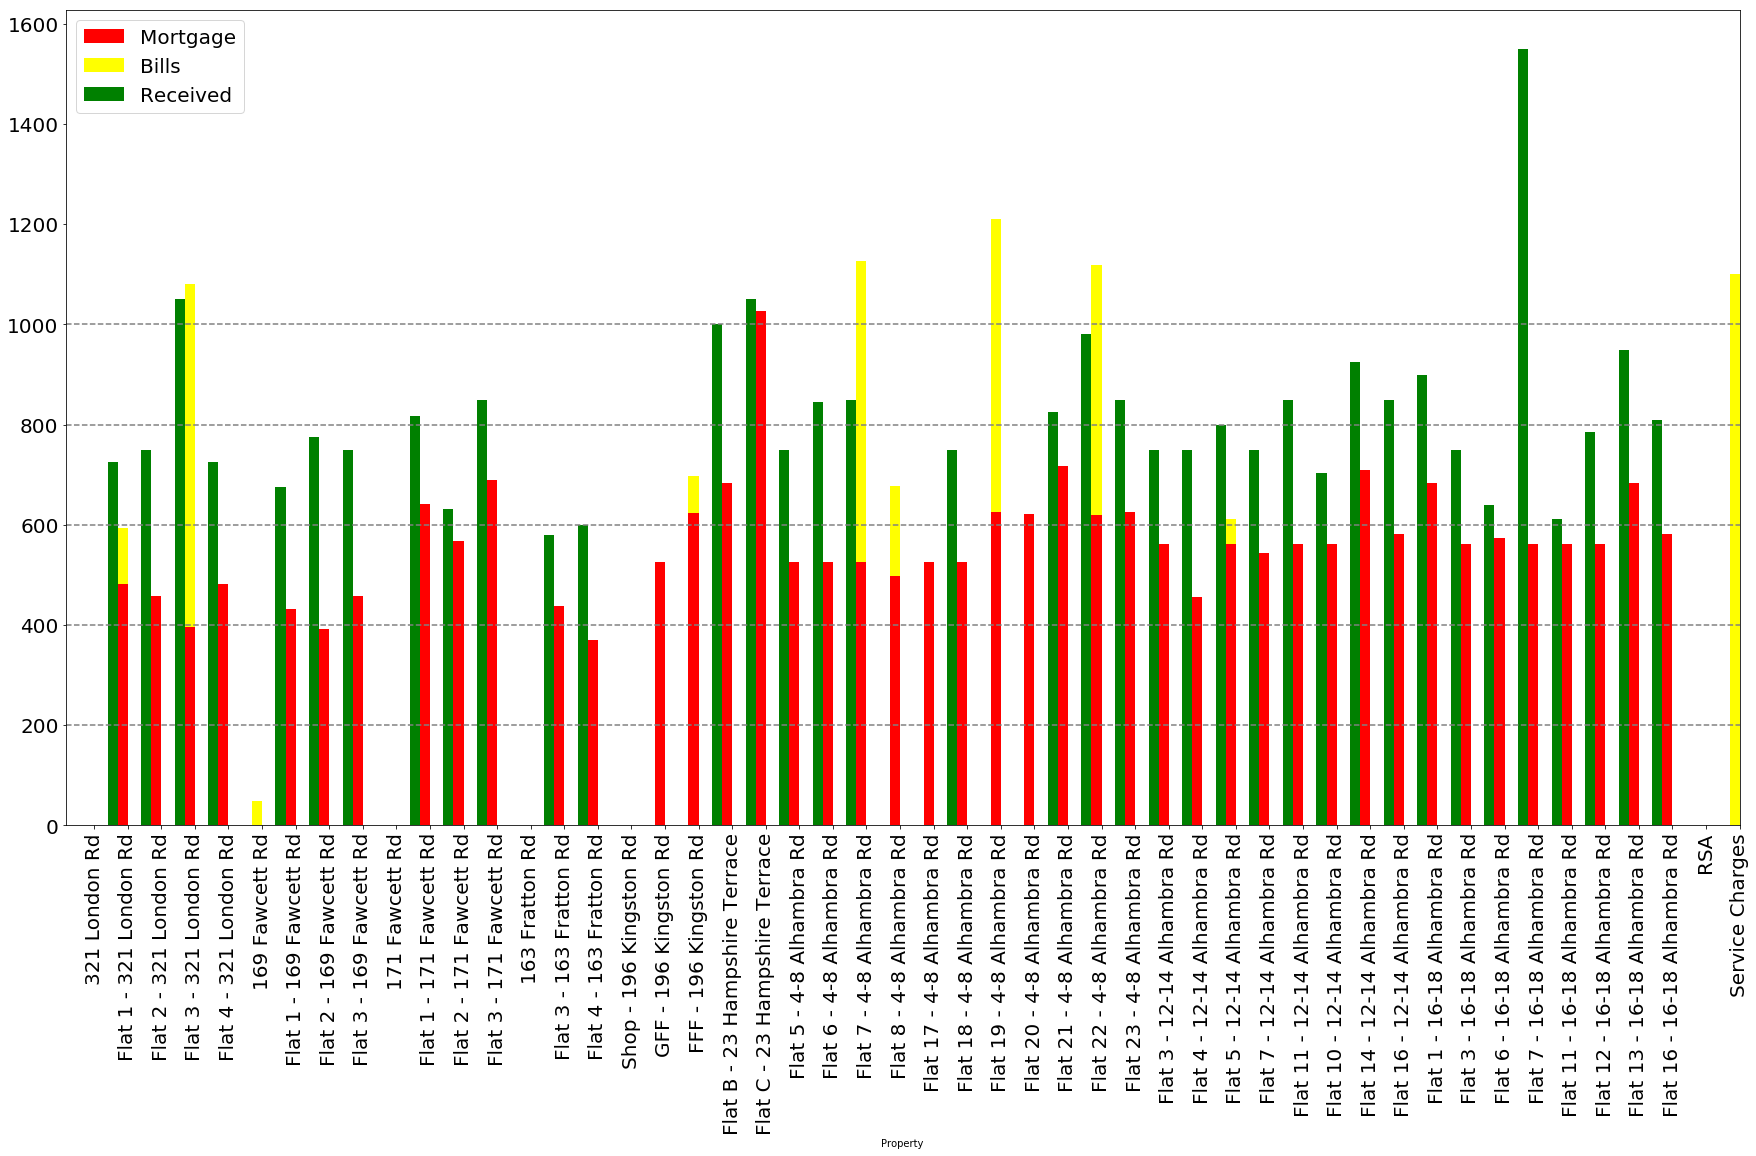

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

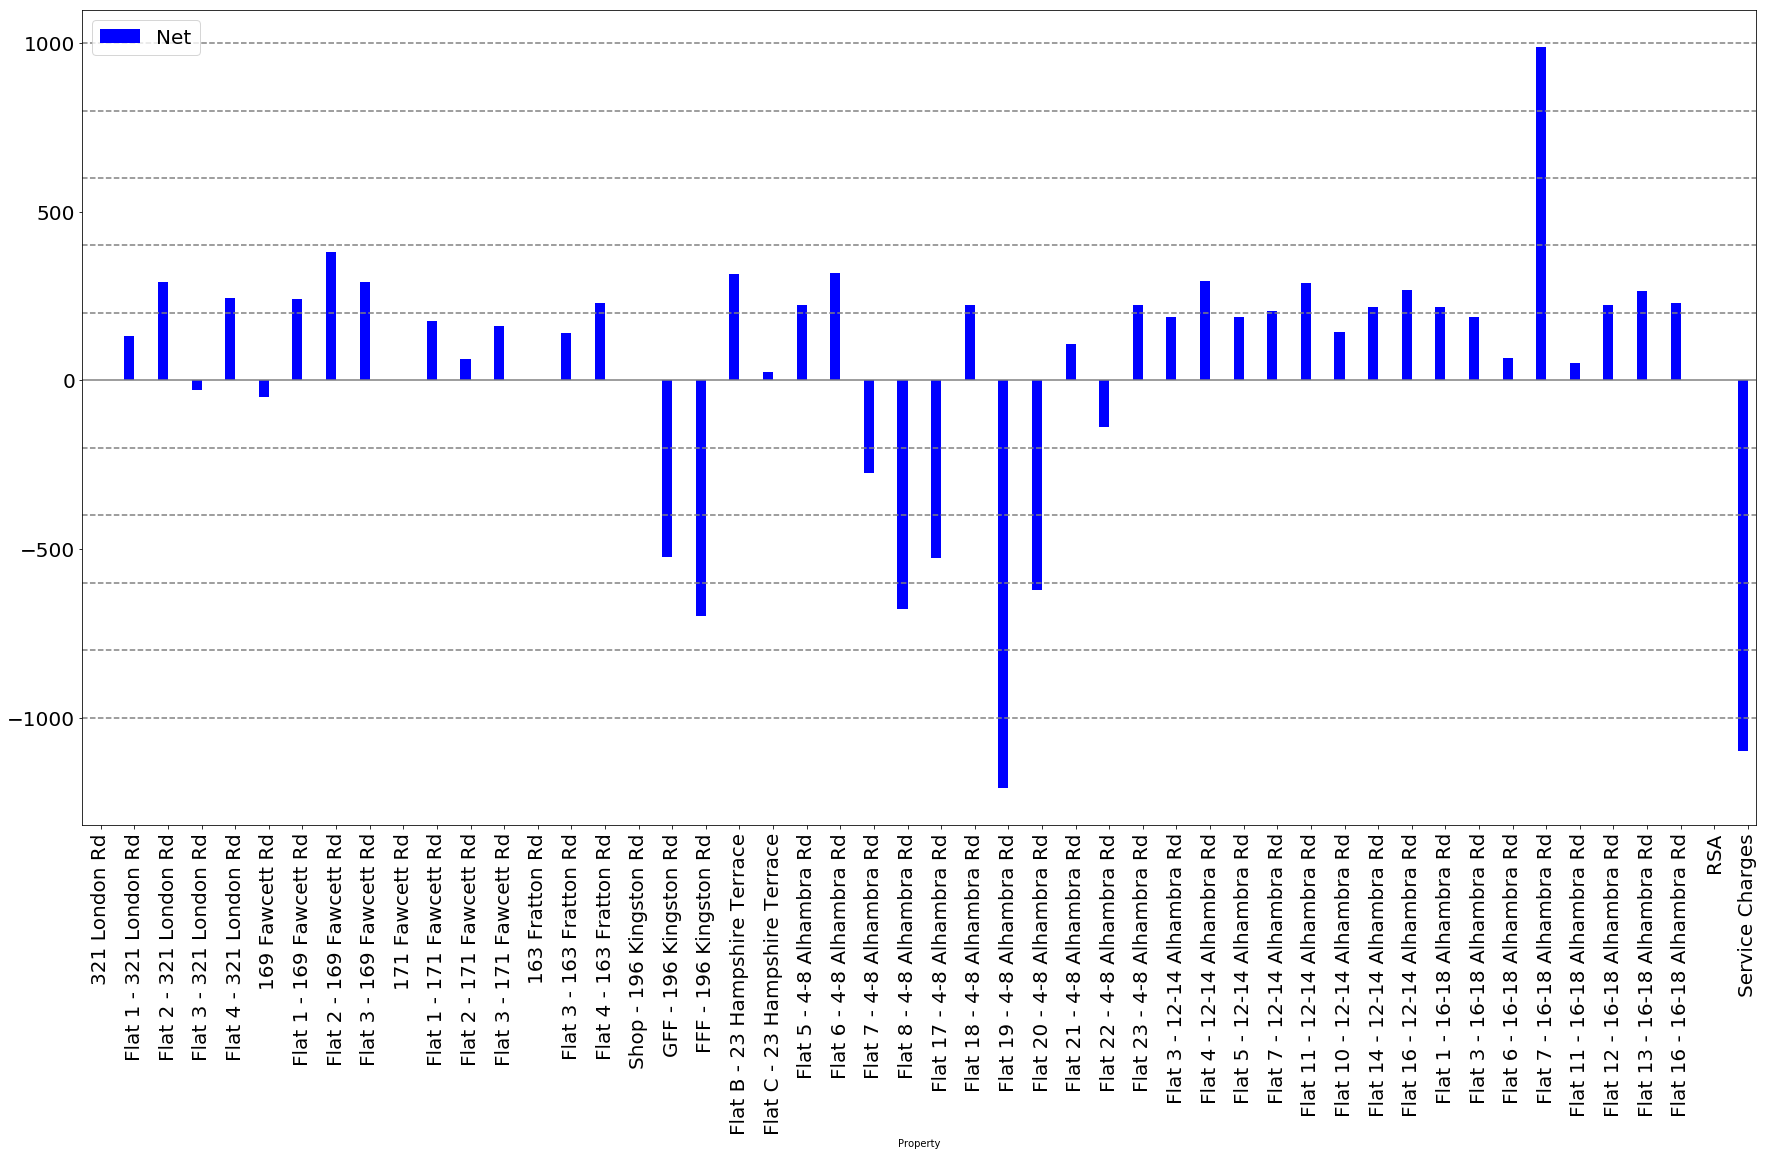

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount
Cat,
Hilltop,-300.00
PersonalExpense,-4163.46
RegularPayment,-1282.28
SchoolFee,-5115.00


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-24313.47,25066.46,752.99


In [9]:
dfMtg['Diff'].sum()

752.989999999998

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount
Cat,


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2024-11-08,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN
2024-11-08,20-74-09 60458872,15.0,Credit,SSE SOUTHERN E 6882766014 REV1114Pa,169FAW,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount
Cat,
PropertyExpense,0.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount
Cat,
